In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder

In [27]:
data = pd.read_excel(r'C:/Users/Help/Desktop/bankruptcy_data/data.xlsx')
data.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [28]:
le = LabelEncoder()
data_numbers = data[data.columns[:]].apply(le.fit_transform)
data_numbers.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [29]:
Y = data_numbers['Class']
X = data_numbers.drop('Class', axis = 1)

Text(0, 0.5, 'Number of records')

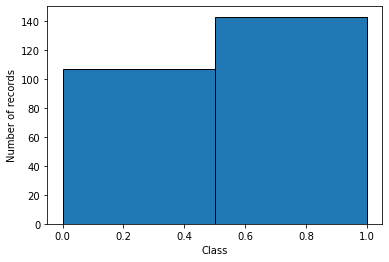

In [30]:
plt.hist(data_numbers["Class"], bins = 2, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y) 

In [47]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [48]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
Y_predictions = clf.predict(X_test)

In [50]:
cm = confusion_matrix(Y_predictions, Y_test)

In [51]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements #create the confusion matrix to identify predicted and real values for bankcrupt
#max depth or trian and test chnages
confusion_matrix(Y_predictions, Y_test)

array([[32,  0],
       [ 0, 43]], dtype=int64)

In [52]:
accuracy(cm)

1.0

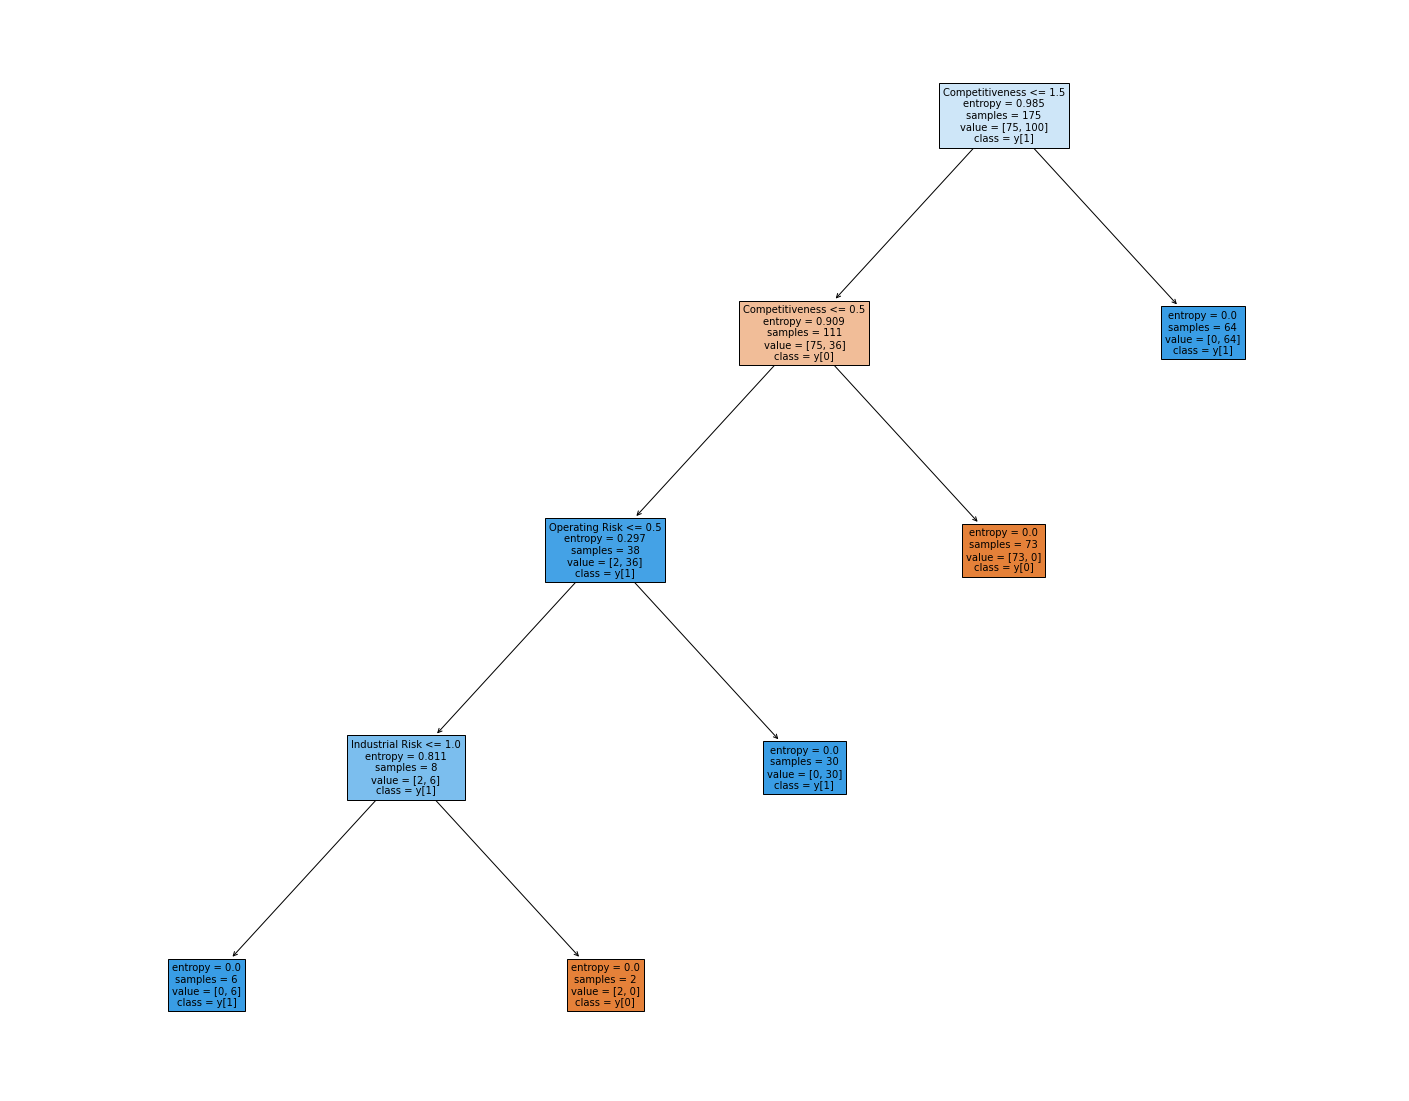

In [53]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()
#maximum and minumum (depth of 7, what happens to the accuracy of the testing data == overfitting)